In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
_time_step = 10   # rnn time step
_input_size = 1   # run input size
_cell_size = 32   # run cell size
_lr = 0.02        # learning rate

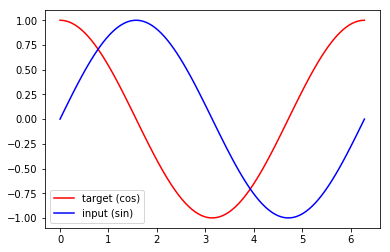

In [4]:
# show data
_steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
_x_np = np.sin(_steps);
_y_np = np.cos(_steps)    # float32 for converting torch FloatTensor
plt.plot(_steps, _y_np, 'r-', label='target (cos)');
plt.plot(_steps, _x_np, 'b-', label='input (sin)')
plt.legend(loc='best');
plt.show()

In [5]:
# tensorflow placeholders
_tf_x = tf.placeholder(tf.float32, [None, _time_step, _input_size])        # shape(batch, 5, 1)
_tf_y = tf.placeholder(tf.float32, [None, _time_step, _input_size])          # input y

In [6]:
# RNN
_rnn_cell = tf.contrib.rnn.BasicRNNCell(num_units=_cell_size)
_init_s = _rnn_cell.zero_state(batch_size=1, dtype=tf.float32)    # very first hidden state
_outputs, _final_s = tf.nn.dynamic_rnn(
    _rnn_cell,                   # cell you have chosen
    _tf_x,                       # input
    initial_state=_init_s,       # the initial hidden state
    time_major=False,            # False: (batch, time step, input); True: (time step, batch, input)
)
_outs2D = tf.reshape(_outputs, [-1, _cell_size])                        # reshape 3D output to 2D for fully connected layer
_net_outs2D = tf.layers.dense(_outs2D, _input_size)
_outs = tf.reshape(_net_outs2D, [-1, _time_step, _input_size])          # reshape back to 3D

In [7]:
_loss = tf.losses.mean_squared_error(labels=_tf_y, predictions=_outs)  # compute cost
_train = tf.train.AdamOptimizer(_lr).minimize(_loss)

In [8]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())     # initialize var in graph

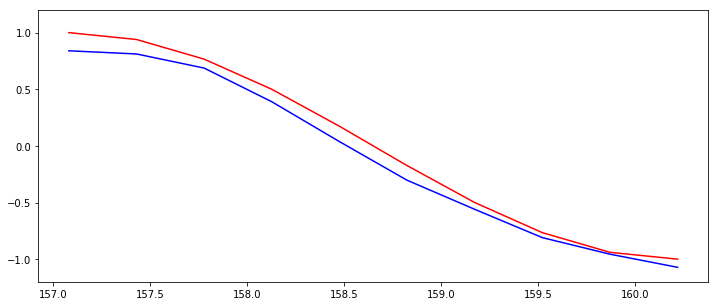

In [24]:
plt.figure(1, figsize=(12, 5)); 
plt.ion()       # continuously plot

for step in range(55):
    start, end = step * np.pi, (step+1)*np.pi   # time range
    # use sin predicts cos
    steps = np.linspace(start, end, _time_step)
    x = np.sin(steps)[np.newaxis, :, np.newaxis]    # shape (batch, time_step, input_size)
    y = np.cos(steps)[np.newaxis, :, np.newaxis]
    if 'final_s' not in globals():                 # first state, no any hidden state
        feed_dict = {_tf_x: x, _tf_y: y}
    else:                                           # has hidden state, so pass it to rnn
        feed_dict = {_tf_x: x, _tf_y: y, _init_s: final_s}
    _, pred_, final_s = sess.run([_train, _outs, _final_s], feed_dict)     # train

    if step == 50:
        # plotting
        plt.plot(steps, y.flatten(), 'r-'); 
        plt.plot(steps, pred_.flatten(), 'b-')
        plt.ylim((-1.2, 1.2)); 
        plt.draw();
        plt.pause(0.05)

plt.ioff(); 
plt.show()